In [117]:
import numpy as np
import scipy.stats as stats
import scipy.special as special
import matplotlib.pyplot as plt
from itertools import combinations
import random

rng = np.random.default_rng(seed=22197823)
random.seed(22197823)

# q1.a)

Data 1: mean : 1.53, std: 0.13. Expected mean and std: 1.5, 0.2
Data 2: mean : 2.01, std: 0.19. Expected mean and std: 2.0, 0.2
T statistic: -4.86, p-value: 0.00039


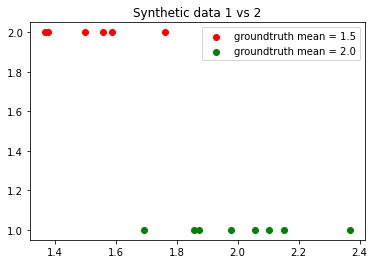

In [118]:
# generate sample data
std_gt = 0.2
mean_1_gt = 1.5
mean_2_gt = 2.0
N_1 = 6
N_2 = 8

group1 = rng.normal(loc=mean_1_gt, scale=std_gt, size=N_1)
group2 = rng.normal(loc=mean_2_gt, scale=std_gt, size=N_2)

mean_1_calc = group1.mean()
mean_2_calc = group2.mean()
std_1_calc = group1.std()
std_2_calc = group2.std()

print(f'Data 1: mean : {mean_1_calc:.02f}, std: {std_1_calc:.02f}. Expected mean and std: {mean_1_gt}, {std_gt}')
print(f'Data 2: mean : {mean_2_calc:.02f}, std: {std_2_calc:.02f}. Expected mean and std: {mean_2_gt}, {std_gt}')

plt.scatter(group1, 2 * np.ones(N_1), color='r', label=f'groundtruth mean = {mean_1_gt}')
plt.scatter(group2, 1 * np.ones(N_2), color='g', label=f'groundtruth mean = {mean_2_gt}')
plt.legend()
plt.title('Synthetic data 1 vs 2')

t_statistic_gt, p_val = stats.ttest_ind(group1, group2)
print(f'T statistic: {t_statistic_gt:.2f}, p-value: {p_val:.5f}')

# q1.b i)

In [119]:
# put group 1 and 2 into 1D array D
D = np.hstack((group1, group2))

# q1.b ii)

In [120]:
# Find all permutations of group 1 and group 2

N = int(special.comb(N_1 + N_2, N_1))
D_group_perms = np.zeros((N, N_1 + N_2))
for row, group1_perm in enumerate(combinations(D, N_1)):
    # for the group 1 permutation, store it as group 1 for this row in D_group_perm
    group1_perm = np.asarray(group1_perm)
    D_group_perms[row, :N_1] = group1_perm
    
    # for any item not in the group 1 permutation then add it to group 2
    group2_idx = N_1
    for item in D:
        if item not in group1_perm:
            D_group_perms[row, group2_idx] = item
            group2_idx += 1
print(f'total number of permutations is {N}')
print(f'sum of D_group_perm should be {N} * D.sum : {D.sum() * N - D_group_perms.sum():.2f}')

total number of permutations is 3003
sum of D_group_perm should be 3003 * D.sum : 0.00


# q1.b iii)

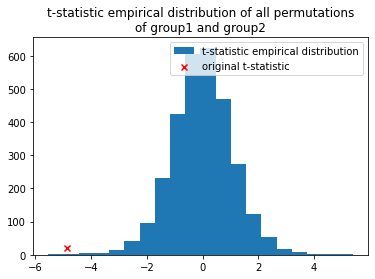

In [121]:
# compute the t-statistic for all group members
# Assuming group 1 and group 2 are independent samples

N = D_group_perms.shape[0]
t_statistic_perms = np.zeros(N)
for row in range(N):
    group1_perm = D_group_perms[row, :N_1]
    group2_perm = D_group_perms[row, N_1:]
    ttest_perm, _ = stats.ttest_ind(group1_perm, group2_perm)
    t_statistic_perms[row] = ttest_perm

plt.hist(t_statistic_perms, bins=20, label='t-statistic empirical distribution')
plt.scatter(x=t_statistic_gt, y=20, marker='x', color='r', label='original t-statistic')
plt.title('t-statistic empirical distribution of all permutations\nof group1 and group2')
plt.legend()

# q1.b iv)

In [122]:
# to find p-val find original t-statistic and find number of t-statistics with equal or greater value

t_stat_num_equal_or_greater = (t_statistic_perms <= t_statistic_gt).sum()
p_val_perms = t_stat_num_equal_or_greater / N
print(f'original t-statistic = {t_statistic_gt}, empirical p-val = {p_val_perms:.5f}')
print(f'number of t-statistic empirical values equal or more extreme than original: {t_stat_num_equal_or_greater}')
print(f'original calculated p-val: {p_val:.5f}')

original t-statistic = -4.859482669007988, empirical p-val = 0.00067
number of t-statistic empirical values equal or more extreme than original: 2
original calculated p-val: 0.00039


the empirical p-val is almost twice the value to the calculated original p-val. But because there are only two values equal or more extreme in the empirical distribution of the t-statistic it is going to vary quite a lot

# q1.c)

original mean statistic = 0.48, empirical p-val = 0.00133
number of mean statistic empirical values equal or more extreme than original: 4


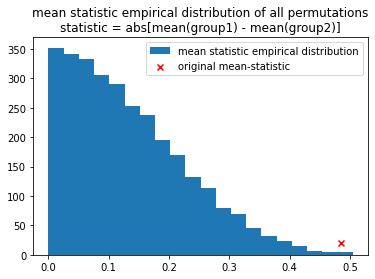

In [123]:
# caclulate using the means as the statistic
mean_statistic_gt = np.abs(group1.mean() - group2.mean())

N = D_group_perms.shape[0]
mean_statistic_perms = np.zeros(N)
for row in range(N):
    group1_perm = D_group_perms[row, :N_1]
    group2_perm = D_group_perms[row, N_1:]
    mean_statistic_perms[row] = np.abs(group1_perm.mean() - group2_perm.mean())

plt.hist(mean_statistic_perms, bins=20, label='mean statistic empirical distribution')
plt.scatter(x=mean_statistic_gt, y=20, marker='x', color='r', label='original mean-statistic')
plt.title('mean statistic empirical distribution of all permutations\nstatistic = abs[mean(group1) - mean(group2)]')
plt.legend()

# to find p-val find original t-statistic and find number of t-statistics with equal or greater value
mean_stat_num_equal_or_greater = (mean_statistic_perms >= mean_statistic_gt).sum()
p_val_mean_perms = mean_stat_num_equal_or_greater / N
print(f'original mean statistic = {mean_statistic_gt:.2f}, empirical p-val = {p_val_mean_perms:.5f}')
print(f'number of mean statistic empirical values equal or more extreme than original: {mean_stat_num_equal_or_greater}')

we are checking for different means, so we use the absolute difference, which is the equivalent of doing a two tailed test.

# q1.d i)

In [154]:
# calculate 1000 random permutations of group1 and group2 selection
# Note the original group1 and group2 musrt be in the final sample

M = 1000
# we will create a set of all unique selections of group 1
# then we will create an ndarray of all samples including the missing group 2 items
group1_unique_perms = set()
# set is initialised with group 1
group1_unique_perms.add(tuple(group1))
D_tuple = tuple(D)

# use a while loop because sampled perms are not always going to be unique so will
# have to go through the loop probably more than M times
# Note: sets only allow unique items, so perm is only added if unique
while len(group1_unique_perms) < M:
    group1_perm = tuple(sorted(random.sample(D_tuple, N_1)))
    group1_unique_perms.add(group1_perm)

# now add group 2 to the group 1 selections
D_group_perms_1000 = np.zeros(shape=(M, N_1 + N_2))
for row, group1_tuple_perm in enumerate(group1_unique_perms):
    # store group 1 in ndarray
    D_group_perms_1000[row, :N_1] = np.asarray(group1_tuple_perm)
    # store the remaining items as group 2 in ndarray
    i = N_1
    for item in D:
        if item not in group1_tuple_perm:
            D_group_perms_1000[row, i] = item
            i += 1

print(f'check permutation array sum is {M} * D.sum(), diff is : {M * D.sum() - D_group_perms_1000.sum()}')

check permutation array sum is 1000 * D.sum(), diff is : 0.0


# q1.d ii)

original t-statistic = -4.86, empirical p-val = 0.00100
number of t-statistic empirical values equal or more extreme than original: 1

p-val comparison:
0.00039 : original p-val
0.00067 : all permutations p-val
0.00100 : 1000 permutations p-val


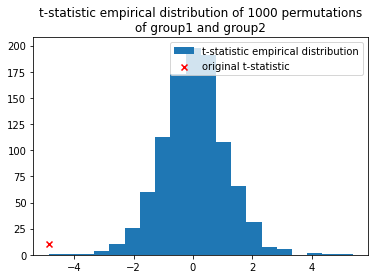

In [165]:
# compute the t-statistic for all group members using the 1000 sampled permutations
# Assuming group 1 and group 2 are independent samples

N = D_group_perms_1000.shape[0]
t_statistic_perms_1000 = np.zeros(N)
for row in range(N):
    group1_perm = D_group_perms_1000[row, :N_1]
    group2_perm = D_group_perms_1000[row, N_1:]
    ttest_perm, _ = stats.ttest_ind(group1_perm, group2_perm)
    t_statistic_perms_1000[row] = ttest_perm

plt.hist(t_statistic_perms_1000, bins=20, label=f't-statistic empirical distribution')
plt.scatter(x=t_statistic_gt, y=10, marker='x', color='r', label='original t-statistic')
plt.title(f't-statistic empirical distribution of {M} permutations\nof group1 and group2')
plt.legend()

# find p-val of 1000 perms vs original p-val and all perms p-val
t_stat_1000_num_equal_or_greater = (t_statistic_perms_1000 <= t_statistic_gt).sum()
p_val_perms_1000 = t_stat_1000_num_equal_or_greater / N
print(f'original t-statistic = {t_statistic_gt:.2f}, empirical p-val = {p_val_perms_1000:.5f}')
print(f'number of t-statistic empirical values equal or more extreme than original: {t_stat_1000_num_equal_or_greater}')
print(f'\np-val comparison:\n{p_val:.5f} : original p-val\n{p_val_perms:.5f} : all permutations p-val\n{p_val_perms_1000:.5f} : {M} permutations p-val')

We would expect the p-val with 1000 randomly sampled permutations to be higher than with all permutations because with all permutations there were only 2 equal or more extreme t-statistics. So we would expect about 2/3003 randomly sampled permutations to be equal or more extreme, but this value is less than one, so we expect about 1 which is what we see

# q1.d iii)

In [203]:
# check there are no duplicate permutations
# To check this we will create an array of the same size as D_group_perms_1000, and then
# sort all group 1 items and sort all group 2 items. This way any duplicates that have a different
# sort order will be flagged as duplicate.
# once group 1 and group 2 are sorted we then create a unique array of permutations. Use the shape
# to calculate the number of unique permutations

# create array of sorted group 1 and sorted group 2 permutations
D_group_perms_1000_sorted = np.zeros(shape=D_group_perms_1000.shape)
D_group_perms_1000_sorted[:,:N_1] = np.sort(D_group_perms_1000[:,:N_1], axis=1)
D_group_perms_1000_sorted[:,N_1:] = np.sort(D_group_perms_1000[:,N_1:], axis=1)

# only keep the unique permutations
D_group_perms_1000_sorted_unique = np.unique(D_group_perms_1000_sorted, axis=0)

# calculate the number of duplicates
print(f'number of duplicated permutations: {M - D_group_perms_1000_sorted_unique.shape[0]}')

number of duplicated permutations: 0


If your sample is large enough, sampling permutations with replacement doesn't change the value of the p-value as long as your samples are independent.